In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from IPython.display import display
# autoreload
%load_ext autoreload
%autoreload 2

# CSRP/Compustat Merged Database - Security Monthly

In [3]:
#  Information
# Importing the dataset
crsp_q_ccm = pd.read_csv('./data/crsp_q_ccm_1.csv')
crsp_q_ccm['datadate'] = pd.to_datetime(crsp_q_ccm['datadate'], errors='coerce')

crsp_q_ccm.head()

/var/folders/1f/rjjb6d_j1nx2wjjbspryf95r0000gn/T/ipykernel_507/211227487.py:3: DtypeWarning: Columns (33,34,37,39,40,49,53,54,55,61,75,76,81,86) have mixed types. Specify dtype option on import or set low_memory=False.
  crsp_q_ccm = pd.read_csv('./data/crsp_q_ccm_1.csv')


,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,iid,datadate,...,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate,curr_sp500_flag
0,1004,P,1,LU,54594,20000,1972-04-24,E,1,2013-10-31,...,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,NaN,1972-04-24,0
1,1004,P,1,LU,54594,20000,1972-04-24,E,1,2006-01-31,...,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,NaN,1972-04-24,0
2,1004,P,1,LU,54594,20000,1972-04-24,E,1,2006-12-31,...,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,NaN,1972-04-24,0
3,1004,P,1,LU,54594,20000,1972-04-24,E,1,2009-08-31,...,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,NaN,1972-04-24,0
4,1004,P,1,LU,54594,20000,1972-04-24,E,1,2005-12-31,...,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,NaN,1972-04-24,0


In [6]:
crsp_q_ccm.shape


(1791868, 88)

In [3]:
# Filter and sort the data
display(pd.DataFrame(crsp_q_ccm[crsp_q_ccm["GVKEY"] == 1004]["datadate"].sort_values().reset_index(drop=True), columns=["datadate"]))

,datadate
0,2000-01-31
1,2000-02-29
2,2000-03-31
3,2000-04-30
4,2000-05-31
...,...
283,2023-08-31
284,2023-09-30
285,2023-10-31
286,2023-11-30


# Financial Ratios Firm Level by WRDS (Beta)

In [4]:
# Importing the dataset
wrdsapps_finratio = pd.read_csv('./data/wrdsapps_finratio.csv')
# Convert public_date to datetime
wrdsapps_finratio['public_date'] = pd.to_datetime(wrdsapps_finratio['public_date'], errors='coerce')

wrdsapps_finratio.head(10)
# print size
print("Size of wrdsapps_finratio:", wrdsapps_finratio.shape)

Size of wrdsapps_finratio: (1144984, 76)


In [5]:
# Filter and sort the data
display(pd.DataFrame(wrdsapps_finratio[wrdsapps_finratio["gvkey"] == 1004]["public_date"].sort_values().reset_index(drop=True), columns=["public_date"]))

,public_date
0,2001-01-31
1,2001-02-28
2,2001-03-31
3,2001-04-30
4,2001-05-31
...,...
271,2023-08-31
272,2023-09-30
273,2023-10-31
274,2023-11-30


# Combining CRSP/Compustat and WRDS Financial Ratio

In [6]:
import pandas as pd

# Ensure datadate and public_date are in datetime format
crsp_q_ccm['datadate'] = pd.to_datetime(crsp_q_ccm['datadate'], errors='coerce')
wrdsapps_finratio['public_date'] = pd.to_datetime(wrdsapps_finratio['public_date'], errors='coerce')

# Convert to year-month format
crsp_q_ccm['year_month'] = crsp_q_ccm['datadate'].dt.to_period('M')
wrdsapps_finratio['year_month'] = wrdsapps_finratio['public_date'].dt.to_period('M')

# Perform the inner join
full_data = crsp_q_ccm.merge(
    wrdsapps_finratio,
    left_on=['GVKEY', 'year_month'],
    right_on=['gvkey', 'year_month'],
    how='inner'
)

# Drop redundant column if needed (gvkey after merging)
full_data.drop(columns=['gvkey', 'datadate', 'public_date',], inplace=True, errors='ignore')

# Reorder columns to have 'GVKEY' first, then 'year_month'
cols = ['GVKEY', 'year_month'] + [col for col in full_data.columns if col not in ['GVKEY', 'year_month']]
full_data = full_data[cols]

# Sort by GVKEY and year_month
full_data.sort_values(by=['GVKEY', 'year_month'], inplace=True)

full_data.head(100)

,GVKEY,year_month,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,iid,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,TICKER,cusip_y
40,1004,2001-01,P,1,LU,54594,20000,1972-04-24,E,1,...,2.785,0.0,0.0,0.0,-0.006,1.017,NaN,2.24%,AIR,00036110
72,1004,2001-02,P,1,LU,54594,20000,1972-04-24,E,1,...,2.785,0.0,0.0,0.0,-0.006,0.911,NaN,2.50%,AIR,00036110
116,1004,2001-03,P,1,LU,54594,20000,1972-04-24,E,1,...,2.785,0.0,0.0,0.0,-0.006,0.854,NaN,2.66%,AIR,00036110
31,1004,2001-04,P,1,LU,54594,20000,1972-04-24,E,1,...,2.558,0.0,0.0,0.0,0.012,0.746,NaN,3.03%,AIR,00036110
15,1004,2001-05,P,1,LU,54594,20000,1972-04-24,E,1,...,2.558,0.0,0.0,0.0,0.012,0.930,NaN,2.43%,AIR,00036110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1004,2008-12,P,1,LU,54594,20000,1972-04-24,E,1,...,2.759,0.0,0.0,0.0,0.057,1.127,0.231,NaN,AIR,00036110
225,1004,2009-01,P,1,LU,54594,20000,1972-04-24,E,1,...,2.616,0.0,0.0,0.0,-0.003,1.066,0.293,NaN,AIR,00036110
55,1004,2009-02,P,1,LU,54594,20000,1972-04-24,E,1,...,2.616,0.0,0.0,0.0,-0.003,0.777,0.214,NaN,AIR,00036110
211,1004,2009-03,P,1,LU,54594,20000,1972-04-24,E,1,...,2.616,0.0,0.0,0.0,-0.003,0.737,0.203,NaN,AIR,00036110


,Statistic,Value
0,Number of Columns,162
1,Number of Unique GVKEYs,11337
2,Total NA Counts,40350241
3,Earliest Date,2001-01
4,Latest Date,2023-12


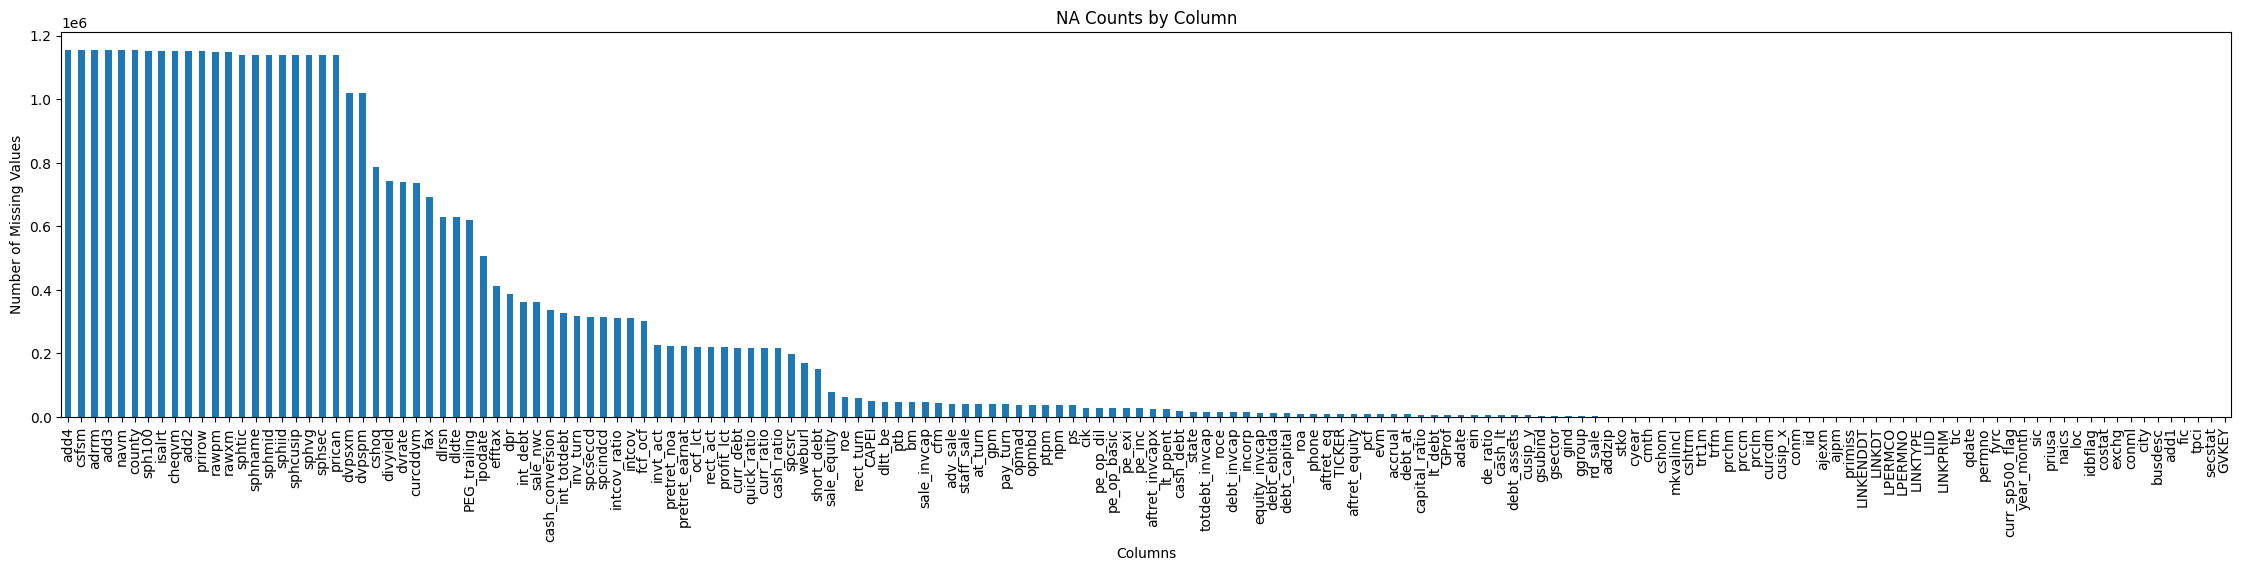

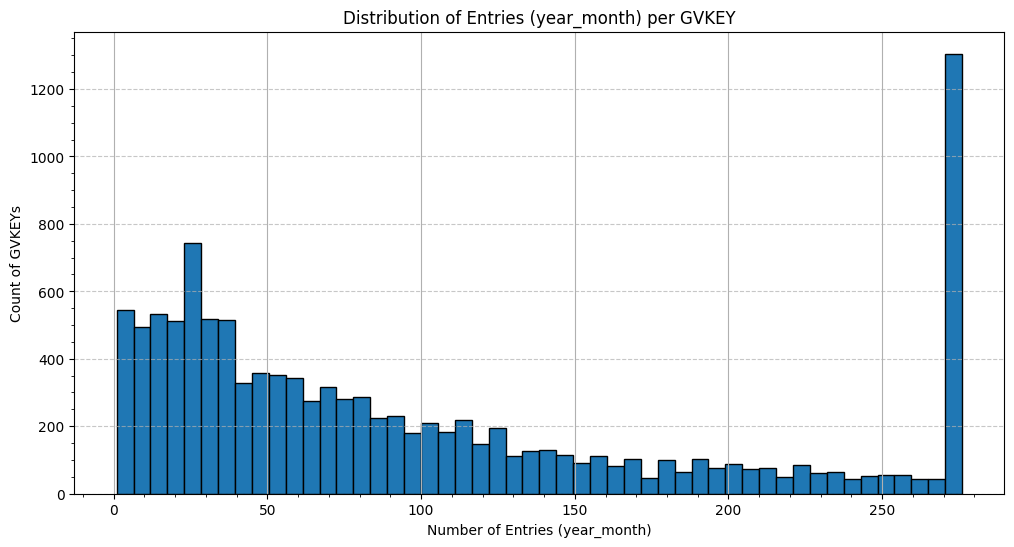

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute statistics
stats = {
    "Number of Columns": full_data.shape[1],
    "Number of Unique GVKEYs": full_data["GVKEY"].nunique(),
    "Total NA Counts": full_data.isna().sum().sum(),
    "Earliest Date": full_data["year_month"].min().strftime('%Y-%m'),
    "Latest Date": full_data["year_month"].max().strftime('%Y-%m')
}

# Convert stats to DataFrame
stats_df = pd.DataFrame(list(stats.items()), columns=["Statistic", "Value"])

display(stats_df)

# Plot missing values per column
plt.figure(figsize=(28, 5))
full_data.isna().sum().sort_values(ascending=False).plot(kind='bar')
plt.title("NA Counts by Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of how many entries (year_month) exist for each GVKEY
gvkey_counts = full_data.groupby("GVKEY")["year_month"].nunique()
plt.figure(figsize=(12, 6))
gvkey_counts.hist(bins=50, edgecolor="black")
plt.title("Distribution of Entries (year_month) per GVKEY")
plt.xlabel("Number of Entries (year_month)")
plt.ylabel("Count of GVKEYs")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.minorticks_on()
plt.show()


We don't need all the GVKEYs, so keep those that have the most data (year_month count).

In [8]:
# Find the maximum number of entries (year_month) per GVKEY
max_entries = gvkey_counts.max()

# Get the GVKEYs that have this maximum count
gvkeys_with_max_entries = gvkey_counts[gvkey_counts == max_entries].index.tolist()

# Print the GVKEYs
print("GVKEYs with the most number of entries:", gvkeys_with_max_entries)
print("Number of entries:", max_entries)

GVKEYs with the most number of entries: [1004, 1050, 1075, 1076, 1078, 1104, 1121, 1161, 1209, 1210, 1230, 1234, 1254, 1266, 1300, 1327, 1380, 1393, 1410, 1440, 1447, 1449, 1487, 1545, 1559, 1562, 1585, 1598, 1602, 1613, 1618, 1632, 1659, 1678, 1686, 1690, 1704, 1706, 1722, 1743, 1773, 1783, 1794, 1820, 1823, 1864, 1878, 1891, 1913, 1919, 1926, 1968, 1979, 1988, 2002, 2005, 2019, 2049, 2052, 2080, 2086, 2101, 2111, 2124, 2136, 2176, 2184, 2220, 2259, 2269, 2285, 2312, 2352, 2390, 2403, 2435, 2436, 2444, 2448, 2497, 2504, 2536, 2547, 2558, 2573, 2574, 2577, 2581, 2593, 2596, 2628, 2663, 2710, 2751, 2771, 2787, 2807, 2817, 2818, 2829, 2884, 2960, 2968, 2986, 2990, 2991, 2999, 3007, 3026, 3028, 3062, 3107, 3121, 3138, 3144, 3153, 3158, 3170, 3226, 3231, 3238, 3243, 3246, 3278, 3336, 3358, 3362, 3369, 3410, 3413, 3424, 3439, 3504, 3505, 3532, 3570, 3580, 3581, 3619, 3622, 3643, 3647, 3650, 3662, 3708, 3735, 3761, 3806, 3813, 3835, 3863, 3897, 3905, 3962, 3964, 3969, 3980, 4001, 4029, 4036,

In [9]:
data_all_dates_trimmed = full_data[full_data["GVKEY"].isin(gvkeys_with_max_entries)]
data_all_dates_trimmed.reset_index(drop=True, inplace=True)

features = [
    'trt1m',  # Target variable

    # 1. Market-Related Factors (Macroeconomic & Market-wide)
    'divyield',  # Dividend Yield
    'bm',  # Book-to-Market Ratio
    'pe_exi', 'pe_inc',  # Price-to-Earnings Ratios
    'evm',  # Enterprise Value Multiple
    'de_ratio', 'debt_capital',  # Debt/Market Cap Ratios
    'ps',  # Price-to-Sales
    'ptb',  # Price-to-Book

    # 2. Profitability & Growth Factors
    'roe', 'roa', 'roce',  # Return on Equity, Assets, Capital Employed
    'gpm', 'npm', 'opmad', 'opmbd',  # Profit Margins (Gross, Net, Operating)
    'rd_sale',  # R&D to Sales
    'adv_sale',  # Advertising Expense to Sales
    'staff_sale',  # Labour Expense to Sales

    # 3. Risk & Leverage Factors
    'dltt_be',  # Long-term Debt/Book Equity 
    'debt_assets',  # Total Debt/Total Assets
    'debt_ebitda',  # Debt/EBITDA
    'intcov', 'intcov_ratio',  # Interest Coverage Ratios
    'ocf_lct',  # Operating CF/Current Liabilities
    'cash_debt',  # Cash Flow/Total Debt

    # 4. Liquidity & Efficiency Factors
    'at_turn',  # Asset Turnover
    'inv_turn',  # Inventory Turnover
    'rect_turn',  # Receivables Turnover
    'pay_turn',  # Payables Turnover
    'curr_ratio', 'quick_ratio', 'cash_ratio',  # Liquidity Ratios

    # 5. Size & Trading Activity
    'cshoq', 'cshom',  # Common Shares Outstanding
    'prccm',  # Market Price per Share (used for Market Cap calculation)
    'cshtrm',  # Trading Volume
    
    # 6. Sector Info
    'gsector' # GICS Sector code
]


data_all_dates_trimmed = data_all_dates_trimmed[['GVKEY', 'year_month'] + features]
data_all_dates_trimmed

,GVKEY,year_month,trt1m,divyield,bm,pe_exi,pe_inc,evm,de_ratio,debt_capital,...,rect_turn,pay_turn,curr_ratio,quick_ratio,cash_ratio,cshoq,cshom,prccm,cshtrm,gsector
0,1004,2001-01,20.9901,2.24%,1.439,19.727,19.727,8.964,1.213,0.487,...,6.892,7.636,2.955,1.031,0.013,NaN,26932000.0,15.1900,1832700.0,20.0
1,1004,2001-02,-10.4674,2.50%,1.439,17.662,17.662,8.964,1.213,0.487,...,6.892,7.636,2.955,1.031,0.013,26.945,26932000.0,13.6000,1129800.0,20.0
2,1004,2001-03,-6.1765,2.66%,1.439,16.571,16.571,8.964,1.213,0.487,...,6.892,7.636,2.955,1.031,0.013,NaN,26932000.0,12.7600,1722200.0,20.0
3,1004,2001-04,-11.3245,3.03%,1.107,19.702,19.702,9.116,1.210,0.483,...,6.822,7.872,2.993,0.992,0.008,NaN,26932000.0,11.2300,1460500.0,20.0
4,1004,2001-05,24.6661,2.43%,1.107,24.561,24.561,9.116,1.210,0.483,...,6.822,7.872,2.993,0.992,0.008,26.937,26932000.0,14.0000,1689600.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355256,141178,2023-08,-17.0366,NaN,NaN,-16.295,-16.295,-57.551,-3.430,1.491,...,6.995,3.401,1.375,0.783,0.200,NaN,116873000.0,0.6355,11778113.0,45.0
355257,141178,2023-09,-33.9103,NaN,NaN,-10.769,-10.769,-57.551,-3.430,1.491,...,6.995,3.401,1.375,0.783,0.200,117.025,116873000.0,0.4200,13195326.0,45.0
355258,141178,2023-10,7.7857,NaN,NaN,-11.608,-11.608,-57.551,-3.430,1.491,...,6.995,3.401,1.375,0.783,0.200,NaN,116873000.0,0.4527,9025243.0,45.0
355259,141178,2023-11,-51.2260,NaN,NaN,-5.018,-5.018,-19.482,-2.994,1.606,...,7.236,3.408,1.286,0.753,0.213,NaN,117032000.0,0.2208,29827280.0,45.0


## Analyse Final Data

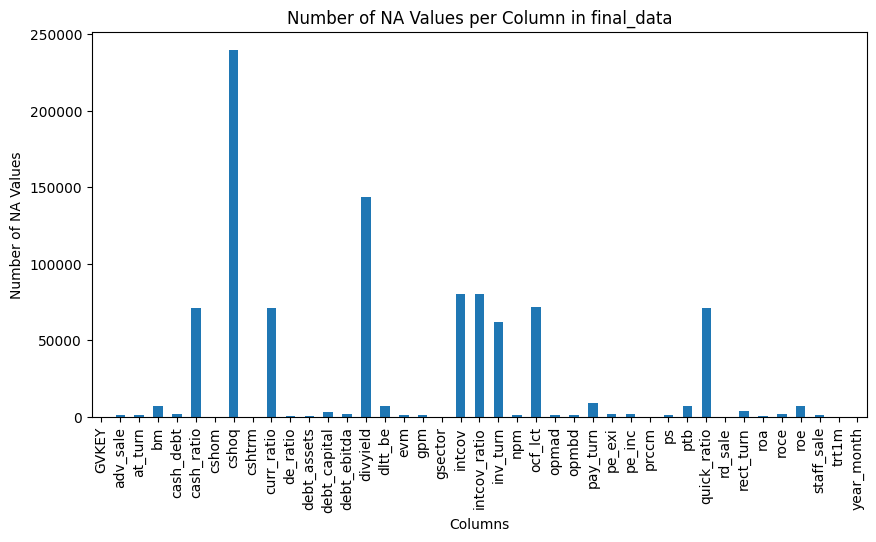

In [10]:
import matplotlib.pyplot as plt

# Calculate the number of NA values for each column
na_counts = data_all_dates_trimmed.isna().sum()

# Sort the NA counts by column names alphabetically
na_counts = na_counts.sort_index()

# Plot the number of NA values per column
plt.figure(figsize=(10, 5))
na_counts.plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Number of NA Values")
plt.title("Number of NA Values per Column in final_data")
plt.xticks(rotation=90)
plt.show()


In [11]:
# threshold = 0.2  % of NA values allowed

# Define columns to check by excluding GVKEY, year_month, and cshoq
cols_to_check = [col for col in data_all_dates_trimmed.columns if col not in ['GVKEY', 'year_month', 'cshoq']]

# Identify companies (GVKEYs) with no missing values in the selected columns
complete_gvkeys = data_all_dates_trimmed.groupby('GVKEY', group_keys=False).filter(
    lambda group: (group[cols_to_check].isna().mean() <= 0).all()
)['GVKEY'].unique()

print("Number of companies with complete data (excluding 'cshoq'):", len(complete_gvkeys))

# Create final_data comprising only of companies with complete data and create a copy
final_data = data_all_dates_trimmed[data_all_dates_trimmed['GVKEY'].isin(complete_gvkeys)].copy()
final_data.reset_index(drop=True, inplace=True)

# Ensure data is sorted by date within each company
final_data.sort_values(['GVKEY', 'year_month'], inplace=True)

# Interpolate missing cshoq values within each company group using transform to preserve the index
final_data['cshoq'] = final_data.groupby('GVKEY')['cshoq'].transform(lambda x: x.interpolate(method='linear'))

# Optionally fill remaining NaNs (e.g. at the beginning) using backward and forward fill:
final_data['cshoq'] = final_data.groupby('GVKEY')['cshoq'].transform(lambda x: x.bfill().ffill())

final_data


Number of companies with complete data (excluding 'cshoq'): 127


,GVKEY,year_month,trt1m,divyield,bm,pe_exi,pe_inc,evm,de_ratio,debt_capital,...,rect_turn,pay_turn,curr_ratio,quick_ratio,cash_ratio,cshoq,cshom,prccm,cshtrm,gsector
0,1078,2001-01,-6.9935,1.69%,0.113,25.931,25.931,15.618,0.867,0.289,...,5.431,4.163,1.545,1.171,0.197,1548.255000,1.545620e+09,44.86,94326500.0,35.0
1,1078,2001-02,9.2064,1.55%,0.114,27.522,27.522,18.691,0.783,0.254,...,5.306,4.381,1.716,1.311,0.269,1548.255000,1.546586e+09,48.99,58953200.0,35.0
2,1078,2001-03,-3.6742,1.61%,0.114,26.511,26.511,18.691,0.783,0.254,...,5.306,4.381,1.716,1.311,0.269,1548.255000,1.546586e+09,47.19,72272600.0,35.0
3,1078,2001-04,-1.2715,1.81%,0.114,26.056,26.056,18.691,0.783,0.254,...,5.306,4.381,1.716,1.311,0.269,1549.139000,1.546586e+09,46.38,65910800.0,35.0
4,1078,2001-05,12.0742,1.62%,0.111,43.317,43.317,18.033,1.026,0.345,...,5.180,4.407,1.244,0.932,0.163,1550.023000,1.548857e+09,51.98,85142700.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36438,66290,2023-08,5.8343,4.41%,1.121,22.122,22.122,8.351,1.726,0.538,...,8.155,9.007,1.404,0.852,0.094,114.003000,9.358900e+07,9.07,9909594.0,20.0
36439,66290,2023-09,23.1533,3.58%,1.121,27.244,27.244,8.351,1.726,0.538,...,8.155,9.007,1.404,0.852,0.094,114.068333,9.364700e+07,11.17,28470225.0,20.0
36440,66290,2023-10,-1.4324,3.67%,0.825,23.213,23.213,7.455,1.651,0.522,...,8.451,9.029,1.461,0.931,0.141,114.133667,9.364700e+07,10.91,21882505.0,20.0
36441,66290,2023-11,12.8323,3.25%,0.825,26.191,26.191,7.455,1.651,0.522,...,8.451,9.029,1.461,0.931,0.141,114.199000,9.364700e+07,12.31,12994932.0,20.0


,gvkey,conm,gsector,Sector
0,1078,ABBOTT LABORATORIES,35.0,Health Care
1,1209,AIR PRODUCTS & CHEMICALS INC,15.0,Materials
2,1300,HONEYWELL INTERNATIONAL INC,20.0,Industrials
3,1380,HESS CORP,10.0,Energy
4,1598,AMETEK INC,20.0,Industrials


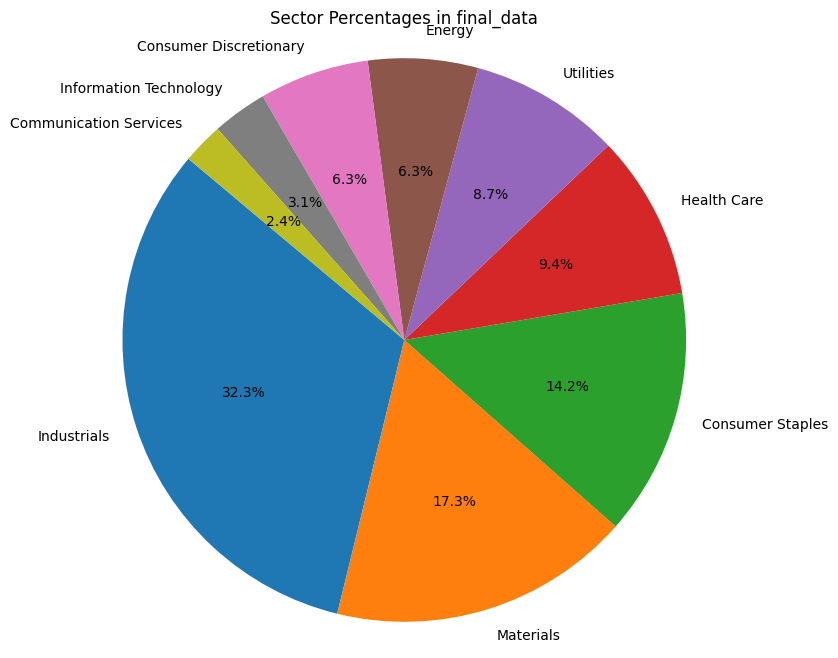

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract unique gvkeys from final_data
unique_keys = pd.DataFrame(final_data['GVKEY'].unique(), columns=['gvkey'])

# Read the lookup CSV to get company names and merge with unique gvkeys
lookup = pd.read_csv('./data/lookup.csv')
unique_lookup = lookup.drop_duplicates(subset=['gvkey'])
merged = pd.merge(unique_keys, unique_lookup[['gvkey', 'conm']], on='gvkey', how='left')

# Extract gsector for each company from final_data (assuming one unique sector per GVKEY)
gvkey_sector = final_data.groupby('GVKEY')['gsector'].first().reset_index()
merged = pd.merge(merged, gvkey_sector, left_on='gvkey', right_on='GVKEY', how='left')
merged = merged[['gvkey', 'conm', 'gsector']]

# Read the GIC CSV to extract unique sector code and full sector name
gic_lookup = pd.read_csv('./data/gic.csv')[['Sector Code', 'Sector']].drop_duplicates()
gic_lookup.rename(columns={'Sector Code': 'gsector'}, inplace=True)
gic_lookup['gsector'] = gic_lookup['gsector'].astype(merged['gsector'].dtype)

# Merge the GIC lookup to add the full sector names to merged
merged = pd.merge(merged, gic_lookup, on='gsector', how='left')

# Display the merged DataFrame with company names and full sector names
display(merged.head())

# Plot a pie chart of the sector percentages using the full sector names
sector_counts = merged['Sector'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sector Percentages in final_data")
plt.axis('equal')
plt.show()


---
# Lookup Table


In [ ]:
lookup = pd.read_csv('./data/lookup.csv')
lookup

,gvkey,conm,tic,cusip,cik,sic,naics,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT
0,1000,A & E PLASTIK PAK INC,AE.2,000032102,NaN,3089,NaN,P,01,LU,25881,23369,1970-11-13,1978-06-30
1,1001,A & M FOOD SERVICES INC,AMFD.,000165100,723576.0,5812,722.0,P,01,LU,10015,6398,1983-09-20,1986-07-31
2,1002,AAI CORP,AAIC.1,000352104,1306124.0,3825,NaN,C,01,LC,10023,22159,1972-12-14,1973-06-05
3,1003,A.A. IMPORTING CO INC,ANTQ,000354100,730052.0,5712,442110.0,C,01,LU,10031,6672,1983-12-07,1989-08-16
4,1004,AAR CORP,AIR,000361105,1750.0,5080,423860.0,P,01,LU,54594,20000,1972-04-24,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32335,352262,COOL COMPANY LTD,CLCO,G2415A113,1944057.0,4400,4831.0,P,01,LC,23773,59507,2023-03-17,E
32336,353444,HALEON PLC,HLN,405552100,1900304.0,2834,325412.0,P,90,LC,23209,59330,2022-07-22,E
32337,355398,SUPER HI INTERNATIONAL HOLDI,HDL,86803S106,1995306.0,5812,722511.0,P,90,LC,25134,59886,2024-05-17,E
32338,356128,JOINT STOCK COMPANY KASPI KZ,KSPI,48581R205,1985487.0,6141,522291.0,C,90,LC,24704,59765,2024-01-19,E
